In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import sys
sys.path.insert(1, '../../models/Multi-Body')
from multidataset import MultiDataset

In [6]:
#Parameters to change, can change model_type to 'best' or 'last'
use_jet_pt = True
use_jet_mass = True
N = 8

#Loading datasets
train_path = '../../datasets/n-subjettiness_data/train_all.npy'
val_path = '../../datasets/n-subjettiness_data/val_all.npy'
test_path = '../../datasets/n-subjettiness_data/test_all.npy'

train_set = MultiDataset(train_path, N, use_jet_pt, use_jet_mass)
val_set = MultiDataset(val_path, N, use_jet_pt, use_jet_mass)
test_set = MultiDataset(test_path, N, use_jet_pt, use_jet_mass)

training_data, train_prob = train_set[:]
val_data, val_prob = val_set[:]
testing_data, test_prob = test_set[:]

In [4]:
labels = []
for i in range(N-1):
    if i != N-2:
        labels.append('tau_'+str(i+1)+'_'+str(0.5))
        labels.append('tau_'+str(i+1)+'_'+str(1))
        labels.append('tau_'+str(i+1)+'_'+str(2))
    else:
        labels.append('tau_'+str(i+1)+'_'+str(1))
        labels.append('tau_'+str(i+1)+'_'+str(2))
if use_jet_pt:
    labels.append('jet_pt')
if use_jet_mass:
    labels.append('jet_mass')

In [14]:
full_data = np.concatenate((training_data,train_prob),axis=1)
df_train = pd.DataFrame(full_data, columns=np.append(labels, ['background_prob', 'signal_prob']))
sig_train = df_train.loc[df_train['signal_prob'] == 1].drop(columns=['background_prob', 'signal_prob'])
bkg_train = df_train.loc[df_train['background_prob'] == 1].drop(columns=['background_prob', 'signal_prob'])

full_data = np.concatenate((val_data,val_prob),axis=1)
df_val = pd.DataFrame(full_data, columns=np.append(labels, ['background_prob', 'signal_prob']))
sig_val = df_val.loc[df_val['signal_prob'] == 1].drop(columns=['background_prob', 'signal_prob'])
bkg_val = df_val.loc[df_val['background_prob'] == 1].drop(columns=['background_prob', 'signal_prob'])

full_data = np.concatenate((testing_data,test_prob),axis=1)
df_test = pd.DataFrame(full_data, columns=np.append(labels, ['background_prob', 'signal_prob']))
sig_test = df_test.loc[df_test['signal_prob'] == 1].drop(columns=['background_prob', 'signal_prob'])
bkg_test = df_test.loc[df_test['background_prob'] == 1].drop(columns=['background_prob', 'signal_prob'])

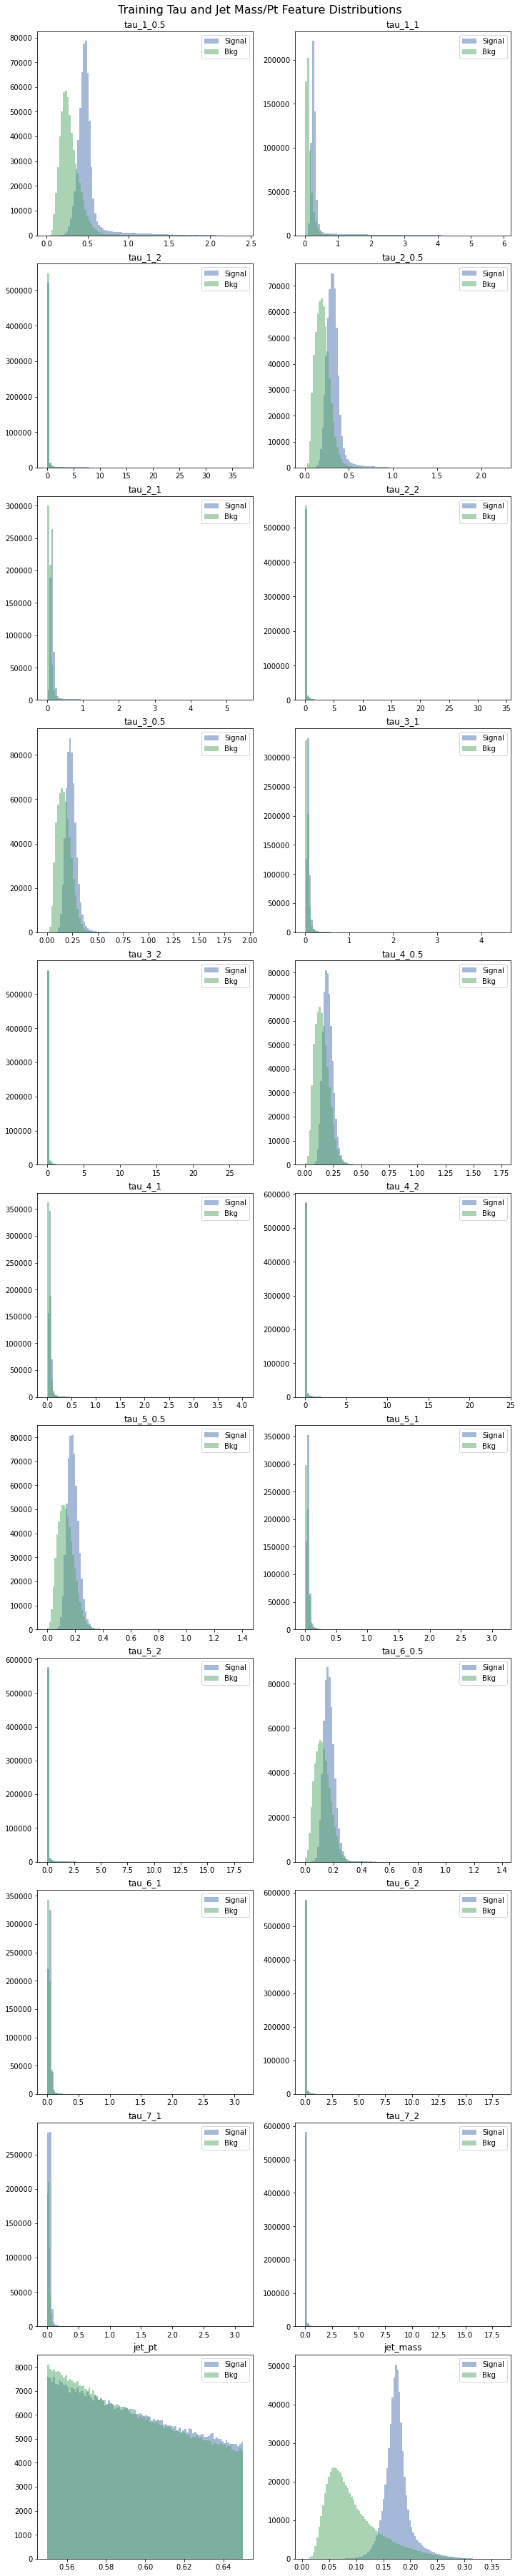

In [23]:
#Train feature distribtuions
n_bins = 100
plt.style.use('seaborn-deep')
f, a = plt.subplots(11, 2, constrained_layout=True, figsize=(10,50))
f.suptitle('Training Tau and Jet Mass/Pt Feature Distributions', fontsize=16)
a = a.ravel()
for idx,ax in enumerate(a):
    #ax.axes.yaxis.set_ticklabels([])
    ax.hist(sig_train.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Signal')
    ax.hist(bkg_train.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Bkg')
    ax.set_title(sig_train.columns[idx])
    ax.legend(loc='upper right')
#Saves feature distribution
#plt.savefig('figures/train_features.png', dpi = 150, bbox_inches = 'tight')

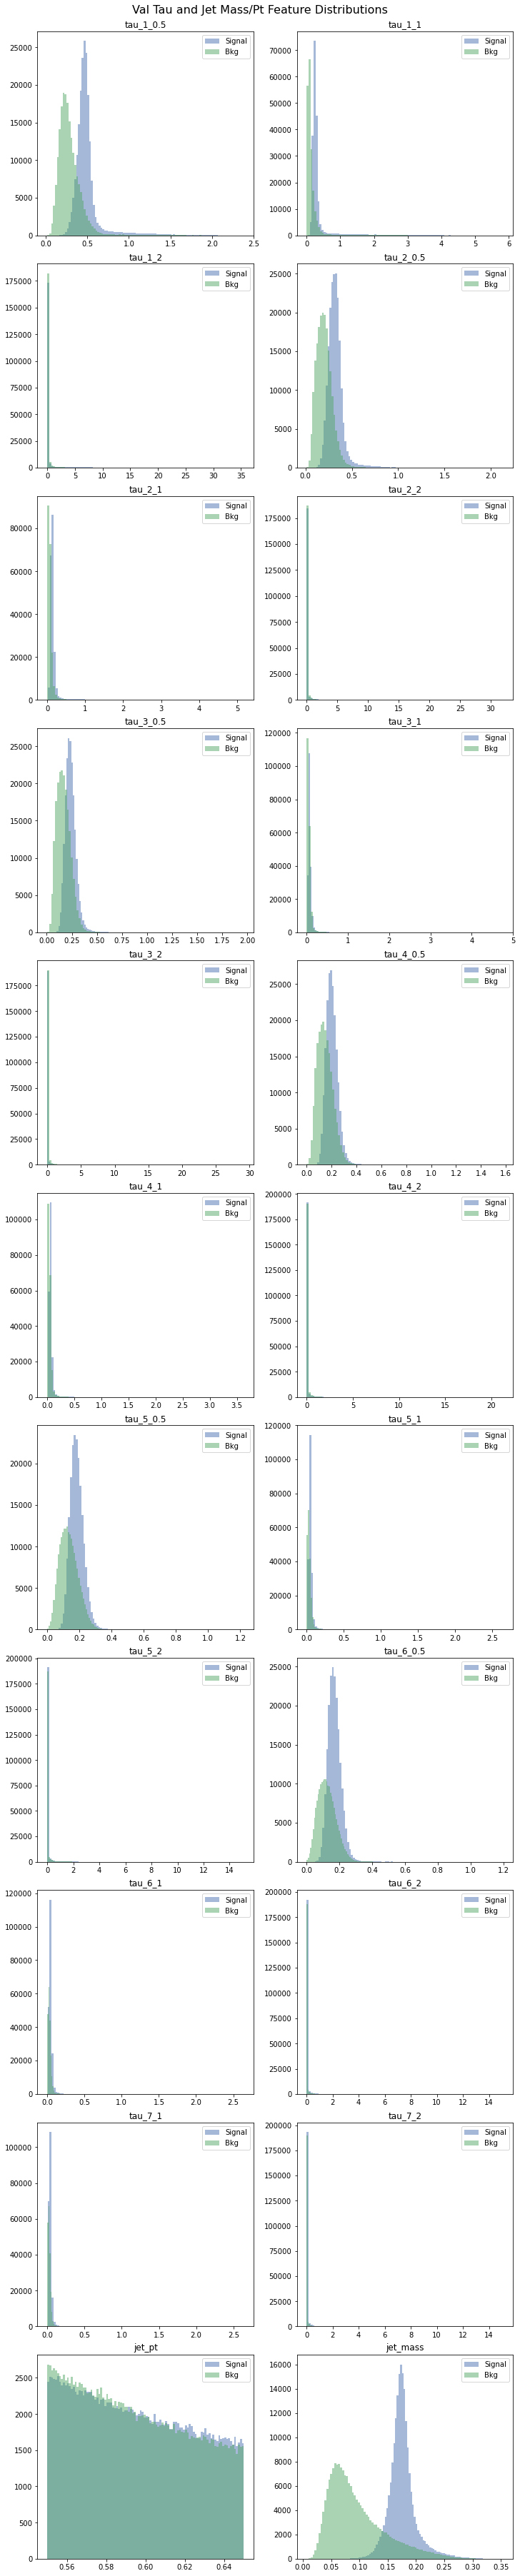

In [24]:
#Val feature distribtuions
n_bins = 100
plt.style.use('seaborn-deep')
f, a = plt.subplots(11, 2, constrained_layout=True, figsize=(10,50))
f.suptitle('Val Tau and Jet Mass/Pt Feature Distributions', fontsize=16)
a = a.ravel()
for idx,ax in enumerate(a):
    #ax.axes.yaxis.set_ticklabels([])
    ax.hist(sig_val.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Signal')
    ax.hist(bkg_val.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Bkg')
    ax.set_title(sig_val.columns[idx])
    ax.legend(loc='upper right')
#Saves feature distribution
#plt.savefig('figures/val_features.png', dpi = 150, bbox_inches = 'tight')

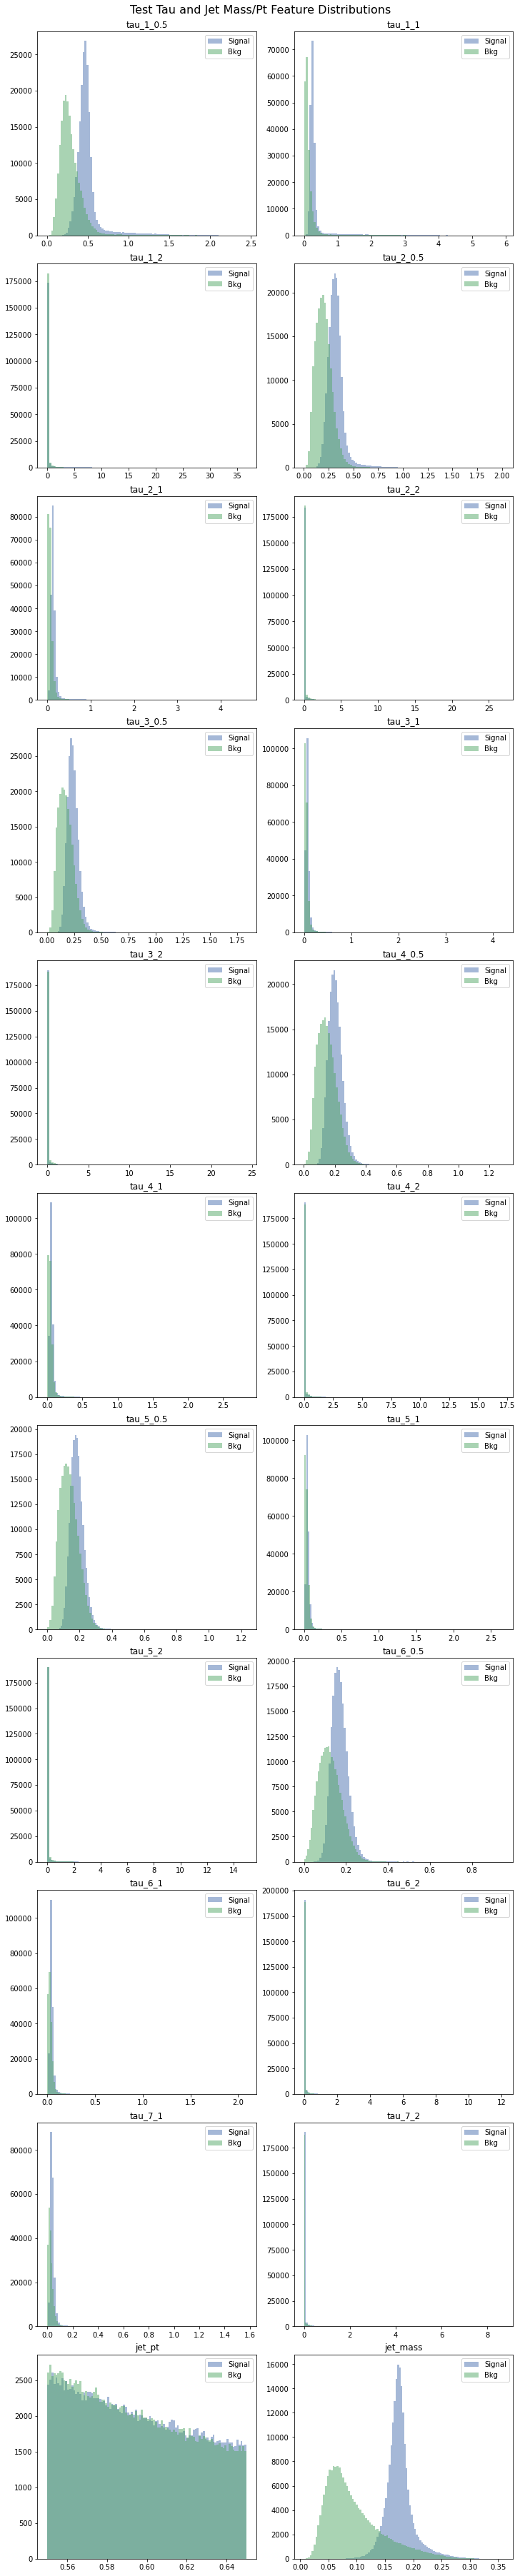

In [25]:
#Test feature distribtuions
n_bins = 100
plt.style.use('seaborn-deep')
f, a = plt.subplots(11, 2, constrained_layout=True, figsize=(10,50))
f.suptitle('Test Tau and Jet Mass/Pt Feature Distributions', fontsize=16)
a = a.ravel()
for idx,ax in enumerate(a):
    #ax.axes.yaxis.set_ticklabels([])
    ax.hist(sig_test.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Signal')
    ax.hist(bkg_test.iloc[:, idx], bins=n_bins, alpha=0.5, label = 'Bkg')
    ax.set_title(sig_test.columns[idx])
    ax.legend(loc='upper right')
#Saves feature distribution
#plt.savefig('figures/test_features.png', dpi = 150, bbox_inches = 'tight')